In [1]:
# import des modules data
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

# importation des modules de machine learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df = pd.read_csv('/home/apprenant/PycharmProjects/NYC_cabs/data/clean.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,trip_duration_h,speed_km_h,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,1.498521,0.126389,11.856428,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,1.805507,0.184167,9.803659,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,6.385098,0.590000,10.822201,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,1.485498,0.119167,12.465721,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,1.188588,0.120833,9.836594,Saturday,13


## 2. Choix du modèle de machine learning

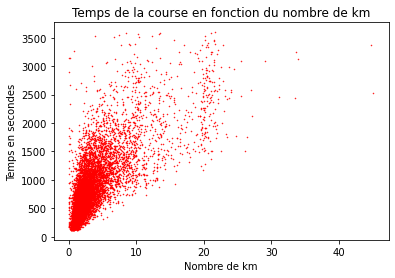

In [4]:
# On affiche le nuage de points dont on dispose
plt.plot(df['distance_km'], df['trip_duration'], 'ro', markersize=0.5)
plt.xlabel('Nombre de km')
plt.ylabel('Temps en secondes')
plt.title("Temps de la course en fonction du nombre de km")
plt.show()

Clairement, d'après la visualisation, on peut se dire que la distance dépend de manière linéaire de la colonne trip_duration . On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite.

## 3. Préparation des données

### 3.a échantillonage

In [5]:
# l'echantillon n'est deja pas tres grand

### 3.b Sélection de la variable cible et des variables à explicatives

On définit a présent notre variable cible

In [10]:
y= df.trip_duration

In [11]:
X= df[["distance_km"]]

## 4. Division du jeu de données en training/validation/testing sets

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

## 5. Apprentissage sur le training set

#### On implémente la regression linéaire

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

#### On obtient ainsi les parmètres β1 et β0 de notre modèle

In [14]:

print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")
min1 = round(regr.intercept_/60,2)
min2 = round(regr.coef_[0]/60,2)

print("On comprend donc que tous les trajet dure au moins {}min auquel il faut ajouter {}min par km"
     .format(min1,min2))

Le coefficient β1 est égal à 112.1 tandis que l'intercept β0 est égal à 443


On comprend donc que tous les trajet dure au moins 7.38min auquel il faut ajouter 1.87min par km


#### Prédictions:

In [15]:
x_to_predict = 5
x_df =  pd.DataFrame({'distance': [x_to_predict]})

min3 = round(regr.predict(x_df)[0]/60,2)
print("Selon le modèle, il faut {}min pour parcourir {}km"
      .format(min3, x_to_predict))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, il faut 16.72min pour parcourir 5km


On remarque que 5 * 112.1 + 443 = 1003.5


#### représentation:

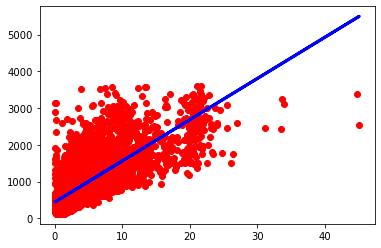

In [16]:
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)


## 5. Evaluation du modèle sur le testing set

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

#### évaluation à partir du R2

In [18]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.548 alors que pour les données de test, il est de 0.592


Le coefficient de détermination R2 est proche de 0.5, ce n'est pas un résultat solide. 
les R2 des jeux d'entrainement et de test sont proche, le modèle est donc robuste.

#### évaluation à partir du RMSE

In [19]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 389.662 alors que pour les données de test, il est de 372.468


A nouveau on remarque qu'il y a peu de perte entre les deux modèles

#### évaluation graphique

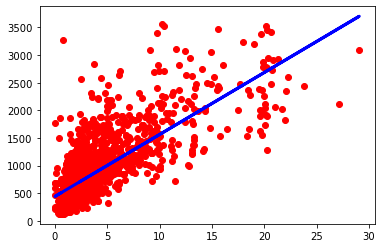

In [20]:
# Plot outputs
plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ytestpred, color='blue', linewidth=3)

plt.show()

Il y a une grande dispersion du model.